# __IBM Data Science Capstone Project__

This project uses historical car accident and cooresponding weather data to build a model that can predict the severity of an accident.

# __Part I Introduction To The Business Problem__

### _A description of the problem and a discussion of the background_

First responders (firefighters, policeman, ambulance drivers, paramedics, EMTs) are all professions that are the first to arrive to the scene of a traffic accident. However, first responders and their stations are not always in the optimal location to reach the scene of the next accident. The further first responders are from an accident, the more risk there is to those involved in the accident and the more risk their is to first responder safety. 

For example, 
- Firetruck accidents rank as the second leading cause of on-the-job deaths for firefighters.
- Approximately 500 firefighters are involved in fatal firetruck crashes every year; on average, 1 in 100 of those occupants die as a result of the crash.
- Between 2006 and 2016, more than one police officer per week was killed on average from a collision or from being struck directly by another vehicle.
- More than 10,000 ambulance-related collisions occur annually; from 1993 to 2010, approximately 97 EMS technicians were killed in collisions.

Source: https://insurance.glatfelters.com/first-responder-safety-roadside-safety


#### Project Goal
The goal of this project is to help minimize the risk posed to first responders on their way to an accident. By using machine learning categorization and prediction models, we can discover the most common accident locations and conditions. This information can be used to optimally staff and position first responders so they can minimize travel risk on the job.  

#### Target Audience

The target audience for this project are the government entities and policymakers who are interested in optimizing their emergency services regarding car accidents. This can also be used within the emergency response service entities to optimize their own response time. 

# __Part II Data Cleansing__

The data preparation includes all the required activities to construct the final dataset which will be fed into the modeling tools. Data preparation can be performed multiple times and it includes balancing the labeled data, transformation, filling missing data, and cleaning the dataset.

### _A description of the data and how it will be used to solve the problem_
The data used in this project contains 194,673 records of motor vehicle accidents and corresponding weather conditions. The date range for these accidents is from 2004-2020 in the United States. This dataset was provided by Coursea. 

The data set includes key fields like accident seveirty (personal or property damage), coordinates of the accident, weather on the day of the accident, time of the accident, collision type, junction type, and number of persons involved. 

This information can be extracted from the raw data to find the most common accident conditions that cause severe personal injury and provide a reccomendation for where first responders should be located/focus patrols to reduce their travel time to an accident. 

Please see the rest of the notebook for a full exercise on the data extraction and understanding: 

The first step is to import the raw data file and the required libraries for initial data analysis and understanding.

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

#Import raw data from file
raw_collision_data = pd.read_csv('C:/Users/71062489/Documents/Personal/GitHub Projects/Data_Collisions.csv')
raw_collision_data.head()


C:\Users\71062489\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,2,-122.323148,47.703140,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,2,1,-122.347294,47.647172,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,3,1,-122.334540,47.607871,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,4,1,-122.334803,47.604803,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,5,2,-122.306426,47.545739,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The second step is to complete basic data cleanup. 

In [2]:
#Pre-pross The Data
#Drop Unecessary Columns 
#Dropping excess identifier columns not required for analysis. 
cleaned_collision_data = raw_collision_data.drop(['OBJECTID','EXCEPTRSNCODE','EXCEPTRSNDESC','INCKEY',\
                    'COLDETKEY','REPORTNO','STATUS','SEVERITYCODE.1','INTKEY','SDOTCOLNUM','INCDATE'], axis=1)

#Drop location Column as too specific for analysis
cleaned_collision_data = cleaned_collision_data.drop(['LOCATION'], axis=1)
cleaned_collision_data

#Convert Inattention Column to Boolean 1= not paying attention 0= paying attention
cleaned_collision_data["INATTENTIONIND"] = cleaned_collision_data["INATTENTIONIND"].fillna(0)
cleaned_collision_data.loc[(cleaned_collision_data['INATTENTIONIND'] == 'Y'),'INATTENTIONIND'] = 1

#Convert Speeding Column to Boolean 1=Speeding 0= Not Speeding
cleaned_collision_data["SPEEDING"] = cleaned_collision_data["SPEEDING"].fillna(0)
cleaned_collision_data.loc[(cleaned_collision_data['SPEEDING'] == 'Y'),'SPEEDING'] = 1
#cleaned_collision_data['SPEEDING'].value_counts()

#Convert Hit Parked Car Column to Boolean 1=Yes 0= No
cleaned_collision_data.loc[(cleaned_collision_data['HITPARKEDCAR'] == 'Y'),'HITPARKEDCAR'] = 1
cleaned_collision_data.loc[(cleaned_collision_data['HITPARKEDCAR'] == 'N'),'HITPARKEDCAR'] = 0

#Convert Pedestrian Right of Way to Boolean 1=Yes 0= No
cleaned_collision_data.loc[(cleaned_collision_data['PEDROWNOTGRNT'] == 'Y'),'PEDROWNOTGRNT'] = 1
cleaned_collision_data["PEDROWNOTGRNT"] = cleaned_collision_data["PEDROWNOTGRNT"].fillna(0)

#Convert Under Influence of Drugs/Alcohol to Boolean 1=Yes 0= No
cleaned_collision_data.loc[(cleaned_collision_data['UNDERINFL'] == 'Y'),'UNDERINFL'] = 1
cleaned_collision_data.loc[(cleaned_collision_data['UNDERINFL'] == '1'),'UNDERINFL'] = 1
cleaned_collision_data.loc[(cleaned_collision_data['UNDERINFL'] == 'N'),'UNDERINFL'] = 0
cleaned_collision_data.loc[(cleaned_collision_data['UNDERINFL'] == '0'),'UNDERINFL'] = 0
cleaned_collision_data["UNDERINFL"] = cleaned_collision_data["UNDERINFL"].fillna(0)

#Convert Severity from String to Boolean 1=Yes 0= No
cleaned_collision_data.loc[(cleaned_collision_data['SEVERITYDESC'] == '1'),'SEVERITYDESC'] = 1
cleaned_collision_data.loc[(cleaned_collision_data['SEVERITYDESC'] == '0'),'SEVERITYDESC'] = 0

#Convert Blank COLLISIONTYPE to Unknown
cleaned_collision_data["COLLISIONTYPE"] = cleaned_collision_data["COLLISIONTYPE"].fillna('Unknown')
#cleaned_collision_data["COLLISIONTYPE"].isnull().sum()

#Convert Blank WEATHER to Unknown
cleaned_collision_data["WEATHER"] = cleaned_collision_data["WEATHER"].fillna('Unknown')
#cleaned_collision_data["WEATHER"].isnull().sum()

#Convert Blank Road Contitions to Unknown
cleaned_collision_data["ROADCOND"] = cleaned_collision_data["ROADCOND"].fillna('Unknown')
#cleaned_collision_data["ROADCOND"].isnull().sum()

#Convert Blank Light Contitions to Unknown
cleaned_collision_data["LIGHTCOND"] = cleaned_collision_data["LIGHTCOND"].fillna('Unknown')
#cleaned_collision_data["LIGHTCOND"].isnull().sum()

#Convert Description to Unknown
cleaned_collision_data["ST_COLDESC"] = cleaned_collision_data["ST_COLDESC"].fillna('Unknown')
#cleaned_collision_data["ST_COLDESC"].isnull().sum()

#Convert Blank JuntionType to Unknown
cleaned_collision_data["JUNCTIONTYPE"] = cleaned_collision_data["JUNCTIONTYPE"].fillna('Unknown')
#cleaned_collision_data["JUNCTIONTYPE"].isnull().sum()

#Drop Rows that do not have an address type
cleaned_collision_data.dropna(subset = ["ADDRTYPE"], inplace=True)

cleaned_collision_data.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,...,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,...,Overcast,Wet,Daylight,0,0,10,Entering at angle,0,0,0
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,...,Raining,Wet,Dark - Street Lights On,0,0,11,From same direction - both going straight - bo...,0,0,0
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,...,Overcast,Dry,Daylight,0,0,32,One parked--one moving,0,0,0
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,...,Clear,Dry,Daylight,0,0,23,From same direction - all others,0,0,0
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,...,Raining,Wet,Daylight,0,0,10,Entering at angle,0,0,0


Now, let's take a look at the PERSONCOUNT column. There appear to be some outliers here. It is necessary to remove the outliers for analysis. 

count    194673.000000
mean          2.444427
std           1.345929
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: PERSONCOUNT, dtype: float64
The 95th percentile of persons involved in an accident is  5.0


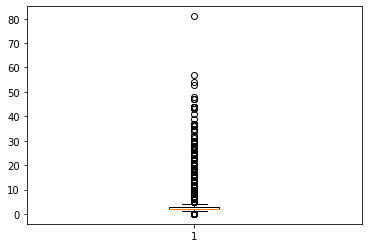

In [3]:
#Understand outliers of the PERSONCOUNT Column
the_95_percentile = raw_collision_data['PERSONCOUNT'].quantile(0.95)

print(raw_collision_data['PERSONCOUNT'].describe())

print("The 95th percentile of persons involved in an accident is ", the_95_percentile)

plt.boxplot(raw_collision_data['PERSONCOUNT'])
plt.show()

Let's remove the PERSONCOUNT outliers using the trimming method.

Since 95% of the accidents involve 5 or less people. Let's remove any accident that involves 6 people or more. 

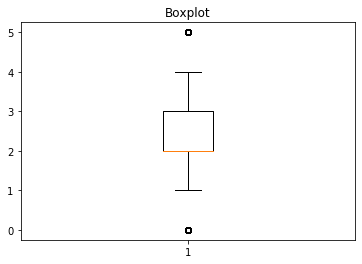

In [4]:
collision_data_persons_outlier = cleaned_collision_data[cleaned_collision_data['PERSONCOUNT'] < 6] 
plt.boxplot(collision_data_persons_outlier['PERSONCOUNT'])
plt.title("Boxplot")
plt.show()

Let's take a look at the accidents by severity description because our above analysis shows that the data is imbalanced. However, for our model, we want to prioritize accidents that have injured persons because those are the most important for first responders to get to. 

1    132400
2     55406
Name: SEVERITYCODE, dtype: int64


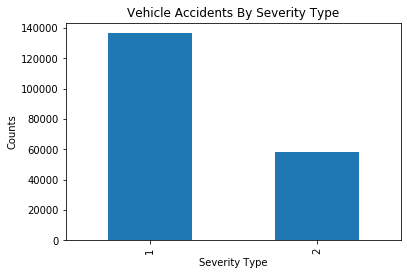

In [5]:
#See Accidents by Severity Description
df_address_type = raw_collision_data['SEVERITYCODE'].value_counts()
df_address_type.plot(kind="bar")
plt.title("Vehicle Accidents By Severity Type")
plt.xlabel("Severity Type")
plt.ylabel("Counts")

print(collision_data_persons_outlier['SEVERITYCODE'].value_counts())

Based on the above histogram, it looks like the data is unbalanced. 

Let's balance it. Since the data set has so many valid records, it makes sense to undersample the property damage class (Class 1) 

In [6]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = collision_data_persons_outlier[collision_data_persons_outlier.SEVERITYCODE==1]
df_minority = collision_data_persons_outlier[collision_data_persons_outlier.SEVERITYCODE==2]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=55406,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.SEVERITYCODE.value_counts()

2    55406
1    55406
Name: SEVERITYCODE, dtype: int64

# __Part III Data Analysis__

Let's take a look at how weather (road conditions, weather conditions, and light conditions) conditions impact accident severity by creating a table of proportions for severity 1 and 2 accidents.

In [7]:
df_RoadConditions = df_downsampled[['ROADCOND','SEVERITYCODE']]
df_RoadConditions_dummies = pd.get_dummies(df_RoadConditions.SEVERITYCODE, prefix='SEVERITY')
df_RoadConditions = pd.concat([df_RoadConditions, df_RoadConditions_dummies], axis=1)
df_RoadConditions = df_RoadConditions.drop(['SEVERITYCODE'], axis=1)
df_RoadConditions.set_index('ROADCOND', inplace=True)
df_RoadConditions  = df_RoadConditions.groupby(['ROADCOND']).sum()
df_transposed_rc = df_RoadConditions.transpose()

df_transposed_rc = (100. * df_transposed_rc / df_transposed_rc.sum()).round(1).astype(str) + '%'

df_transposed_rc

ROADCOND,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
SEVERITY_1,47.5%,59.4%,48.7%,46.1%,46.3%,68.9%,50.0%,80.2%,46.3%
SEVERITY_2,52.5%,40.6%,51.3%,53.9%,53.7%,31.1%,50.0%,19.8%,53.7%


In [8]:
df_Weather = df_downsampled[['WEATHER','SEVERITYCODE']]
df_weather_dummies = pd.get_dummies(df_Weather.SEVERITYCODE, prefix='SEVERITY')
df_Weather = pd.concat([df_Weather, df_weather_dummies], axis=1)
df_Weather = df_Weather.drop(['SEVERITYCODE'], axis=1)
df_Weather.set_index('WEATHER', inplace=True)
df_Weather  = df_Weather.groupby(['WEATHER']).sum()
df_transposed_w = df_Weather.transpose()

df_transposed_w = (100. * df_transposed_w / df_transposed_w.sum()).round(1).astype(str) + '%'

df_transposed_w

WEATHER,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
SEVERITY_1,51.9%,47.4%,46.0%,71.2%,48.1%,25.0%,45.7%,53.8%,54.4%,66.0%,79.6%
SEVERITY_2,48.1%,52.6%,54.0%,28.8%,51.9%,75.0%,54.3%,46.2%,45.6%,34.0%,20.4%


In [10]:
df_LightCond = df_downsampled[['LIGHTCOND','SEVERITYCODE']]
df_light_dummies = pd.get_dummies(df_LightCond.SEVERITYCODE, prefix='SEVERITY')
df_LightCond = pd.concat([df_LightCond, df_light_dummies], axis=1)
df_LightCond = df_LightCond.drop(['SEVERITYCODE'], axis=1)
df_LightCond.set_index('LIGHTCOND', inplace=True)
df_LightCond  = df_LightCond.groupby(['LIGHTCOND']).sum()
df_transposed_l = df_LightCond.transpose()

df_transposed_l = (100. * df_transposed_l / df_transposed_l.sum()).round(1).astype(str) + '%'

df_transposed_l

LIGHTCOND,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
SEVERITY_1,60.2%,55.1%,50.4%,50.0%,45.8%,46.3%,45.7%,60.3%,80.0%
SEVERITY_2,39.8%,44.9%,49.6%,50.0%,54.2%,53.7%,54.3%,39.7%,20.0%


After considering the proportion of severity 1 and 2 accidents in different weather conditions, it appears that no weather condtion heavily increases the likelihood of severity 2 accidents. The proportions for nearly all conditions are close to 50/50. This indicates that weather, road and light conditions do not actually influence accident severity. This is important to note as it is counterintuitive. 

However, there are two notable exceptions to this observation. 

The first is snow conditions show 60% severity 1 accidents and 30% severity 2 accidents. This indicates the opposite of what one may naturally assume. Snow conditions do not cause more severity 2 accidents. We might explain this by saying that in the snow, people are more conscious of how they drive or are less likely to drive at all. Perhaps the most severe accidents occur when people are least prepared for it - in clear and dry conditions. 

Secondly, it appears that "unkown" weather, road, and light conditions are 80% severity 1 accidents. Perhaps this is because the weather was so mild the officer forgot to capture it in the report. Therefore, an accident with weather unknown is more likely to be a severity 1 accident. However, since there is no way to confirm this, it is best to exclude "unkown" and "other" categories from consideration. 

In [12]:
indexNames = df_downsampled[ df_downsampled['WEATHER'] == 'Unknown' ].index
indexNames_1 = df_downsampled[ df_downsampled['ROADCOND'] == 'Unknown' ].index
indexNames_2 = df_downsampled[ df_downsampled['LIGHTCOND'] == 'Unknown' ].index
# Delete these row indexes from dataFrame
#df_downsampled.count() 110812 total records
#df_downsampled.drop(indexNames , inplace=True)
#df_downsampled.drop(indexNames_1 , inplace=True)
#df_downsampled.drop(indexNames_2 , inplace=True)
df_downsampled.count()


SEVERITYCODE      101787
X                 100055
Y                 100055
ADDRTYPE          101787
SEVERITYDESC      101787
COLLISIONTYPE     101787
PERSONCOUNT       101787
PEDCOUNT          101787
PEDCYLCOUNT       101787
VEHCOUNT          101787
INCDTTM           101787
JUNCTIONTYPE      101787
SDOT_COLCODE      101787
SDOT_COLDESC      101787
INATTENTIONIND    101787
UNDERINFL         101787
WEATHER           101787
ROADCOND          101787
LIGHTCOND         101787
PEDROWNOTGRNT     101787
SPEEDING          101787
ST_COLCODE        101770
ST_COLDESC        101787
SEGLANEKEY        101787
CROSSWALKKEY      101787
HITPARKEDCAR      101787
dtype: int64

Next, let's look at the juntion type.

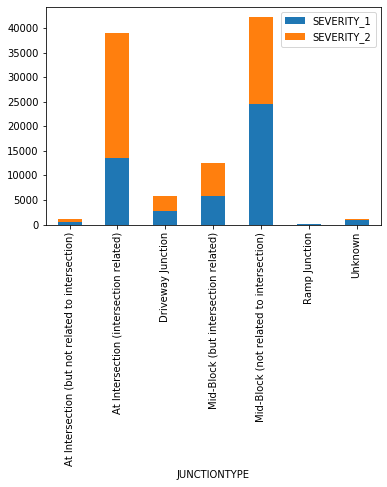

In [13]:
df_junctiontype = df_downsampled[['JUNCTIONTYPE','SEVERITYCODE']]
df_junctiontype_dummies = pd.get_dummies(df_junctiontype.SEVERITYCODE, prefix='SEVERITY')
df_junctiontype = pd.concat([df_junctiontype, df_junctiontype_dummies], axis=1)
df_junctiontype = df_junctiontype.drop(['SEVERITYCODE'], axis=1)
df_junctiontype.set_index('JUNCTIONTYPE', inplace=True)
df  = df_junctiontype.groupby(['JUNCTIONTYPE']).sum()
df[['SEVERITY_1','SEVERITY_2']].plot(kind='bar', stacked=True)

Most accidents occur at a midblock or at an intersection. However, the proportion of severity 2 accidents is slightly higher than 50%. Therefore, these juntion types seem like a good predictor of accident severity. 

Let's do the same analysis for collision type.

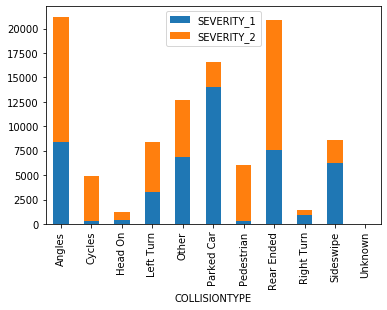

In [14]:
df_collisiontype = df_downsampled[['COLLISIONTYPE','SEVERITYCODE']]
df_collisiontype_dummies = pd.get_dummies(df_collisiontype.SEVERITYCODE, prefix='SEVERITY')
df_collisiontype = pd.concat([df_collisiontype, df_collisiontype_dummies], axis=1)
df_collisiontype = df_collisiontype.drop(['SEVERITYCODE'], axis=1)
df_collisiontype.set_index('COLLISIONTYPE', inplace=True)
df  = df_collisiontype.groupby(['COLLISIONTYPE']).sum()
df[['SEVERITY_1','SEVERITY_2']].plot(kind='bar', stacked=True)


This graph gives us some good insights. It looks like nearly all accidents with a parked car, side swipes, and right turns are severity 1. This makes sense as they are most likely fender benders with cars moving at slow speed. 

Read ended and angles show more than half of accidents are severity 2. So these types of accidents are a good predictor of severity 2 accidents. 

Lastly and most importantly, cycles and pedestrian have overwhelmingly severity 2 accidents. This makes sense because these most likely involve a car hitting a person or a bike. Therefore, these two categories are great predictors of severity 2 accidents. 

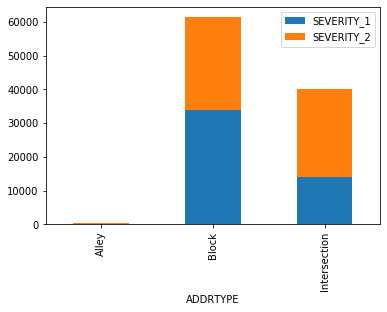

In [15]:
df_collisiontype = df_downsampled[['ADDRTYPE','SEVERITYCODE']]
df_collisiontype_dummies = pd.get_dummies(df_collisiontype.SEVERITYCODE, prefix='SEVERITY')
df_collisiontype = pd.concat([df_collisiontype, df_collisiontype_dummies], axis=1)
df_collisiontype = df_collisiontype.drop(['SEVERITYCODE'], axis=1)
df_collisiontype.set_index('ADDRTYPE', inplace=True)
df  = df_collisiontype.groupby(['ADDRTYPE']).sum()
df[['SEVERITY_1','SEVERITY_2']].plot(kind='bar', stacked=True)

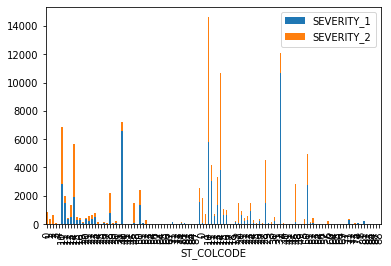

In [114]:
df_collisiontype = df_downsampled[['ST_COLCODE','SEVERITYCODE']]
df_collisiontype_dummies = pd.get_dummies(df_collisiontype.SEVERITYCODE, prefix='SEVERITY')
df_collisiontype = pd.concat([df_collisiontype, df_collisiontype_dummies], axis=1)
df_collisiontype = df_collisiontype.drop(['SEVERITYCODE'], axis=1)
df_collisiontype.set_index('ST_COLCODE', inplace=True)
df  = df_collisiontype.groupby(['ST_COLCODE']).sum()
df[['SEVERITY_1','SEVERITY_2']].plot(kind='bar', stacked=True)

Lastly, let's try to visualize the data geospatially using X,Y coordinates

In [16]:
#Remove data with no geocoordinate data
df_coordinates = df_downsampled.dropna(subset=['X'])
limit = 100 #change limit...larger the limit the longer it takes to plot
df_coordinates = df_coordinates.iloc[0:limit, :]

In [14]:
#import folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\71062489\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py37hf50a25e_2         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                                4.8.5-py37hc8dfbb8_1 --> 4.8.5-py37hf50a25e_2




conda-4.8.5          | 3.0 MB    |            |   0% 
conda-4.8.5          | 3.0 MB    |            |   1% 
conda-4.8.5          | 3.0 MB    | #4         |  14% 
conda-4.8.5          | 3.0 MB    | ##8        |  28% 
conda-4.8.5          | 3.0 MB    | #####2     |  52% 
conda-4.8.5          | 3.0 MB    | ######8    |  68% 
conda-4.8.5          | 3.0 MB    

In [15]:
# define the world map centered around US
us_map = folium.Map(location=[47.6062, -122.3321], zoom_start=8)

# instantiate a feature group for the incidents in the dataframe
accidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_coordinates.Y, df_coordinates.X):
    accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_coordinates.Y)
longitudes = list(df_coordinates.X)
#labels = list(df_coordinates.Category)

for lat, lng in zip(latitudes, longitudes):
    folium.Marker([lat, lng]).add_to(us_map)    
    
# add incidents to map
us_map.add_child(accidents)

It looks like the accident data is centered around the Seattle area. This is good to know for our model because perhaps our model can be extended to the data of other large US cities. 

# __Part IV Modelling__

Through our initial analysis we've gotten some really good insights. First, that perhaps weather is not as influential as intuitively thought. Second, that junction type and collision type are good predictors of accident severity. We will use this information in our models.

Before we can build the model we first need to hot encode the attributes that are needed:
ADDRTYPE, SEVERITYDESC, COLLISIONTYPE, JUNCTIONTYPE

In [17]:
hot_encode_ADDRTYPE = pd.get_dummies(df_downsampled.ADDRTYPE, prefix='ADDRTYPE')
#print(hot_encode_ADDRTYPE.head())

hot_encode_SEVERITYDESC = pd.get_dummies(df_downsampled.SEVERITYDESC, prefix='SEVERITYDESC')
#print(hot_encode_SEVERITYDESC.head())

hot_encode_COLLISIONTYPE = pd.get_dummies(df_downsampled.COLLISIONTYPE, prefix='COLLISIONTYPE')
#print(hot_encode_COLLISIONTYPE.head())

hot_encode_JUNCTIONTYPE = pd.get_dummies(df_downsampled.JUNCTIONTYPE, prefix='JUNCTIONTYPE')
#print(hot_encode_JUNCTIONTYPE.head())

hot_encode_ST_COLDESC = pd.get_dummies(df_downsampled.ST_COLDESC, prefix='ST_COLDESC')
#print(hot_encode_ST_COLDESC.head())

     
hot_encoded_collision_data = pd.concat([df_downsampled,hot_encode_ADDRTYPE,hot_encode_SEVERITYDESC,hot_encode_COLLISIONTYPE,hot_encode_JUNCTIONTYPE,hot_encode_ST_COLDESC],axis=1)
hc_collisiondata = hot_encoded_collision_data.drop(['ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','ST_COLDESC'], axis=1)
hc_collisiondata.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,...,ST_COLDESC_Vehicle Strikes Pedalcyclist,ST_COLDESC_Vehicle Strikes Railway Vehicle,ST_COLDESC_Vehicle Struck by City Road or Construction Machinery,ST_COLDESC_Vehicle Struck by Other Road or Construction Machinery,ST_COLDESC_Vehicle backing hits pedestrian,ST_COLDESC_Vehicle going straight hits pedestrian,ST_COLDESC_Vehicle hits Pedestrian - All Other Actions,ST_COLDESC_Vehicle overturned,ST_COLDESC_Vehicle turning left hits pedestrian,ST_COLDESC_Vehicle turning right hits pedestrian
36725,1,NaN,NaN,2,0,0,2,12/5/2006,0,NOT ENOUGH INFORMATION / NOT APPLICABLE,...,0,0,0,0,0,0,0,0,0,0
37637,1,-122.325893,47.638987,2,0,0,2,2/13/2006 15:52,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",...,0,0,0,0,0,0,0,0,0,0
126434,1,-122.321393,47.585854,2,0,0,2,12/11/2013 7:06,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",...,0,0,0,0,0,0,0,0,0,0
66746,1,-122.388130,47.562042,2,0,0,2,7/12/2008 11:40,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",...,0,0,0,0,0,0,0,0,0,0
150325,1,-122.371320,47.571477,2,0,0,2,12/30/2015 16:00,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",...,0,0,0,0,0,0,0,0,0,0


Before we train a machine learning model, let's create a new dataframe which contains only those attribtutes which will be useful for the model. 

In [21]:
df_knn = hc_collisiondata[['SEVERITYCODE','PERSONCOUNT',\
 'COLLISIONTYPE_Angles',\
 'COLLISIONTYPE_Cycles',\
 'COLLISIONTYPE_Head On',\
 'COLLISIONTYPE_Left Turn',\
 'COLLISIONTYPE_Other',\
 'COLLISIONTYPE_Parked Car',\
 'COLLISIONTYPE_Pedestrian',\
 'COLLISIONTYPE_Rear Ended',\
 'COLLISIONTYPE_Right Turn',\
 'COLLISIONTYPE_Sideswipe',\
 'JUNCTIONTYPE_At Intersection (but not related to intersection)',\
 'JUNCTIONTYPE_At Intersection (intersection related)',\
 'JUNCTIONTYPE_Driveway Junction',\
 'JUNCTIONTYPE_Mid-Block (but intersection related)',\
 'JUNCTIONTYPE_Mid-Block (not related to intersection)',\
 'JUNCTIONTYPE_Ramp Junction','ST_COLDESC_All Other Multi Vehicle',
 'ST_COLDESC_All other non-collision',
 'ST_COLDESC_Breakage of any part of the vehicle resulting in injury or in further property damage',
 'ST_COLDESC_Domestic animal other (cat, dog, etc)',
 'ST_COLDESC_Entering at angle',
 'ST_COLDESC_Fire started in vehicle',
 'ST_COLDESC_Fixed object',
 'ST_COLDESC_From opposite direction - all others',
 'ST_COLDESC_From opposite direction - both going straight - one stopped - sideswipe',
 'ST_COLDESC_From opposite direction - both going straight - sideswipe',
 'ST_COLDESC_From opposite direction - both moving - head-on',
 'ST_COLDESC_From opposite direction - one left turn - one right turn',
 'ST_COLDESC_From opposite direction - one left turn - one straight',
 'ST_COLDESC_From opposite direction - one stopped - head-on',
 'ST_COLDESC_From same direction - all others',
 'ST_COLDESC_From same direction - both going straight - both moving - rear-end',
 'ST_COLDESC_From same direction - both going straight - both moving - sideswipe',
 'ST_COLDESC_From same direction - both going straight - one stopped - rear-end',
 'ST_COLDESC_From same direction - both going straight - one stopped - sideswipe',
 'ST_COLDESC_From same direction - one left turn - one straight',
 'ST_COLDESC_From same direction - one right turn - one straight',
 'ST_COLDESC_Non-domestic animal (deer, bear, elk, etc)',
 'ST_COLDESC_Not stated',
 'ST_COLDESC_One car entering driveway access',
 'ST_COLDESC_One car entering parked position',
 'ST_COLDESC_One car leaving driveway access',
 'ST_COLDESC_One car leaving parked position',
 'ST_COLDESC_One parked--one moving',
 'ST_COLDESC_Other object',
 'ST_COLDESC_Pedalcyclist All Other Involvements ONE UNIT - PEDALCYCLIST ONLY or PEDALCYCLIST STR',
 'ST_COLDESC_Pedalcyclist Strikes Moving Vehicle',
 'ST_COLDESC_Pedalcyclist Strikes Pedalcyclist or Pedestrian',
 'ST_COLDESC_Person fell, jumped or was pushed from vehicle',
 'ST_COLDESC_Railway Vehicle Strikes Pedestrian',
 'ST_COLDESC_Railway Vehicle Strikes Vehicle',
 'ST_COLDESC_Same direction -- both turning left -- both moving -- rear end',
 'ST_COLDESC_Same direction -- both turning left -- both moving -- sideswipe',
 'ST_COLDESC_Same direction -- both turning left -- one stopped -- rear end',
 'ST_COLDESC_Same direction -- both turning left -- one stopped -- sideswipe',
 'ST_COLDESC_Same direction -- both turning right -- both moving -- rear end',
 'ST_COLDESC_Same direction -- both turning right -- both moving -- sideswipe',
 'ST_COLDESC_Same direction -- both turning right -- one stopped -- rear end',
 'ST_COLDESC_Same direction -- both turning right -- one stopped -- sideswipe',
 'ST_COLDESC_Strikes or Was Struck by Object from the Load of Another Vehicle',
 'ST_COLDESC_Strikes or Was Struck by a Part of Another Vehicle (Not from Load)',
 'ST_COLDESC_Unknown',
 'ST_COLDESC_Vehicle - Pedalcyclist',
 'ST_COLDESC_Vehicle Hits City Road or Construction Machinery',
 'ST_COLDESC_Vehicle Hits Other Road or Construction Machinery',
 'ST_COLDESC_Vehicle Hits State Road or Construction Machinery',
 'ST_COLDESC_Vehicle Strikes All Other Non-Domestic Animal',
 'ST_COLDESC_Vehicle Strikes Pedalcyclist',
 'ST_COLDESC_Vehicle Strikes Railway Vehicle',
 'ST_COLDESC_Vehicle Struck by City Road or Construction Machinery',
 'ST_COLDESC_Vehicle Struck by Other Road or Construction Machinery',
 'ST_COLDESC_Vehicle backing hits pedestrian',
 'ST_COLDESC_Vehicle going straight hits pedestrian',
 'ST_COLDESC_Vehicle hits Pedestrian - All Other Actions',
 'ST_COLDESC_Vehicle overturned',
 'ST_COLDESC_Vehicle turning left hits pedestrian',
 'ST_COLDESC_Vehicle turning right hits pedestrian']]

df_knn

,SEVERITYCODE,PERSONCOUNT,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,...,ST_COLDESC_Vehicle Strikes Pedalcyclist,ST_COLDESC_Vehicle Strikes Railway Vehicle,ST_COLDESC_Vehicle Struck by City Road or Construction Machinery,ST_COLDESC_Vehicle Struck by Other Road or Construction Machinery,ST_COLDESC_Vehicle backing hits pedestrian,ST_COLDESC_Vehicle going straight hits pedestrian,ST_COLDESC_Vehicle hits Pedestrian - All Other Actions,ST_COLDESC_Vehicle overturned,ST_COLDESC_Vehicle turning left hits pedestrian,ST_COLDESC_Vehicle turning right hits pedestrian
36725,1,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
37637,1,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
126434,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66746,1,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
150325,1,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,2,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194666,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194668,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194670,2,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, let's define the X of the model. This will be all attributes except for SEVERITYCODE, which is our predictor variable. 

In [22]:
X = df_knn[['PERSONCOUNT',\
 'COLLISIONTYPE_Angles',\
 'COLLISIONTYPE_Cycles',\
 'COLLISIONTYPE_Head On',\
 'COLLISIONTYPE_Left Turn',\
 'COLLISIONTYPE_Other',\
 'COLLISIONTYPE_Parked Car',\
 'COLLISIONTYPE_Pedestrian',\
 'COLLISIONTYPE_Rear Ended',\
 'COLLISIONTYPE_Right Turn',\
 'COLLISIONTYPE_Sideswipe',\
 'JUNCTIONTYPE_At Intersection (but not related to intersection)',\
 'JUNCTIONTYPE_At Intersection (intersection related)',\
 'JUNCTIONTYPE_Driveway Junction',\
 'JUNCTIONTYPE_Mid-Block (but intersection related)',\
 'JUNCTIONTYPE_Mid-Block (not related to intersection)',\
 'JUNCTIONTYPE_Ramp Junction','ST_COLDESC_All Other Multi Vehicle',
 'ST_COLDESC_All other non-collision',
 'ST_COLDESC_Breakage of any part of the vehicle resulting in injury or in further property damage',
 'ST_COLDESC_Domestic animal other (cat, dog, etc)',
 'ST_COLDESC_Entering at angle',
 'ST_COLDESC_Fire started in vehicle',
 'ST_COLDESC_Fixed object',
 'ST_COLDESC_From opposite direction - all others',
 'ST_COLDESC_From opposite direction - both going straight - one stopped - sideswipe',
 'ST_COLDESC_From opposite direction - both going straight - sideswipe',
 'ST_COLDESC_From opposite direction - both moving - head-on',
 'ST_COLDESC_From opposite direction - one left turn - one right turn',
 'ST_COLDESC_From opposite direction - one left turn - one straight',
 'ST_COLDESC_From opposite direction - one stopped - head-on',
 'ST_COLDESC_From same direction - all others',
 'ST_COLDESC_From same direction - both going straight - both moving - rear-end',
 'ST_COLDESC_From same direction - both going straight - both moving - sideswipe',
 'ST_COLDESC_From same direction - both going straight - one stopped - rear-end',
 'ST_COLDESC_From same direction - both going straight - one stopped - sideswipe',
 'ST_COLDESC_From same direction - one left turn - one straight',
 'ST_COLDESC_From same direction - one right turn - one straight',
 'ST_COLDESC_Non-domestic animal (deer, bear, elk, etc)',
 'ST_COLDESC_Not stated',
 'ST_COLDESC_One car entering driveway access',
 'ST_COLDESC_One car entering parked position',
 'ST_COLDESC_One car leaving driveway access',
 'ST_COLDESC_One car leaving parked position',
 'ST_COLDESC_One parked--one moving',
 'ST_COLDESC_Other object',
 'ST_COLDESC_Pedalcyclist All Other Involvements ONE UNIT - PEDALCYCLIST ONLY or PEDALCYCLIST STR',
 'ST_COLDESC_Pedalcyclist Strikes Moving Vehicle',
 'ST_COLDESC_Pedalcyclist Strikes Pedalcyclist or Pedestrian',
 'ST_COLDESC_Person fell, jumped or was pushed from vehicle',
 'ST_COLDESC_Railway Vehicle Strikes Pedestrian',
 'ST_COLDESC_Railway Vehicle Strikes Vehicle',
 'ST_COLDESC_Same direction -- both turning left -- both moving -- rear end',
 'ST_COLDESC_Same direction -- both turning left -- both moving -- sideswipe',
 'ST_COLDESC_Same direction -- both turning left -- one stopped -- rear end',
 'ST_COLDESC_Same direction -- both turning left -- one stopped -- sideswipe',
 'ST_COLDESC_Same direction -- both turning right -- both moving -- rear end',
 'ST_COLDESC_Same direction -- both turning right -- both moving -- sideswipe',
 'ST_COLDESC_Same direction -- both turning right -- one stopped -- rear end',
 'ST_COLDESC_Same direction -- both turning right -- one stopped -- sideswipe',
 'ST_COLDESC_Strikes or Was Struck by Object from the Load of Another Vehicle',
 'ST_COLDESC_Strikes or Was Struck by a Part of Another Vehicle (Not from Load)',
 'ST_COLDESC_Unknown',
 'ST_COLDESC_Vehicle - Pedalcyclist',
 'ST_COLDESC_Vehicle Hits City Road or Construction Machinery',
 'ST_COLDESC_Vehicle Hits Other Road or Construction Machinery',
 'ST_COLDESC_Vehicle Hits State Road or Construction Machinery',
 'ST_COLDESC_Vehicle Strikes All Other Non-Domestic Animal',
 'ST_COLDESC_Vehicle Strikes Pedalcyclist',
 'ST_COLDESC_Vehicle Strikes Railway Vehicle',
 'ST_COLDESC_Vehicle Struck by City Road or Construction Machinery',
 'ST_COLDESC_Vehicle Struck by Other Road or Construction Machinery',
 'ST_COLDESC_Vehicle backing hits pedestrian',
 'ST_COLDESC_Vehicle going straight hits pedestrian',
 'ST_COLDESC_Vehicle hits Pedestrian - All Other Actions',
 'ST_COLDESC_Vehicle overturned',
 'ST_COLDESC_Vehicle turning left hits pedestrian',
 'ST_COLDESC_Vehicle turning right hits pedestrian']].values  #.astype(float)
X[0:5]

array([[2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Now, we set Y to the predictor variable. 

In [23]:
y = df_knn['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### _K Nearest Neighbor_

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (81429, 78) (81429,)
Test set: (20358, 78) (20358,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [28]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 2, 1, 2, 1], dtype=int64)

In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6619509020127964
Test set Accuracy:  0.6560565870910698


### _Logistic Regression_

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the most probable class for that data point. For this, we use Logistic Regression.

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
yhat = LR.predict(X_test)
yhat

array([2, 2, 1, ..., 2, 1, 2], dtype=int64)

In [32]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.38628681, 0.61371319],
       [0.05504429, 0.94495571],
       [0.5756267 , 0.4243733 ],
       ...,
       [0.30104479, 0.69895521],
       [0.8125152 , 0.1874848 ],
       [0.42386507, 0.57613493]])

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [33]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\71062489\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6957461440220061

# __Part V Results__

After data analysis and modeling, we've determined the most important features that impact accident severity and can predict accident severity with 70% accuracy. The most important featuers in accident severity are Junction Type, Collision Type, Number of Persons involved, and the accidend description. 

The most interesting observation is that bad weather did not increase the likelihood that an accident would be severity 2. 

Our K-Nearest neighbor model produced only 66% accuracy. This was a good model choice given the characteristics of the dataset. However, the accuracy was not as high as would be acceptable. Perhaps the accurcay in this model was lower because the different attributes used in predicition are not necessarily related to one another. Therefore, it may be hard for the algorithm to compile the similarity measure. 

Our logisitc regression model produced 70% accuracy. This is certainly an improvement and sufficent accuracy for the first pass at the model. Perhaps this model had better accuracy because the target variable was binary. 



# __Part VI Discussion__

The insights gained from this model is that accidents involving pedestrians and cyclists at intersections and midblocks are the most severe in terms of personal injury. For our first responders, this means that in order to reduce accident damage, first responders should be concentrated in locations where pedestrians and cyclists are common - like city centers, school zones, city parks, etc. In addition, first responders should be positioned in places that reduce drive times to these locations. 

# __Part VI Conclusion__

In conclusion, this was a successful first attempt at predicting accident severity through the use of machine learning classification models. 

To take this analysis farther, we would like to do the following things. 

First, rerun the analysis using weather, road conditions, and light conditions as the only variable. The low impact these variables had on accident severity was interesting and it would be worthwhile to isolate that variable and understand what, if any, impact it has on accidents. 

Second, we would want to run the same analysis as above but with a dataset for which the records contain all information in totality. A lot of the records used were missing some values, either weather related, geographical, or other. It would be interesting to see how the models performed on a data set with 100% available information. 
 